In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.figsize'] = (8, 4)

In [4]:
df = pd.read_table('consistency.tsv')
df.head()

,rank,taxon,count,astral,astral.e5p50,concat.cons,concat.cons.b50,concat.rand,concat.rand.b50
0,kingdom,Archaea,652,1.000,1.000,1.000,1.000,1.000,1.000
1,kingdom,Bacteria,9574,1.000,1.000,1.000,1.000,1.000,1.000
2,phylum,Acidobacteria,56,0.965,0.965,0.930,0.860,0.965,0.965
3,phylum,Actinobacteria,1097,0.994,0.994,0.932,0.932,0.992,0.992
4,phylum,Aquificae,17,0.941,0.941,1.000,1.000,0.941,0.941


In [5]:
df.shape[0]

11646

#### Simple sum of taxa

In [6]:
df.iloc[:, 3:].sum()

astral             11433.888
astral.e5p50       11433.481
concat.cons        11424.458
concat.cons.b50    11418.325
concat.rand        11430.104
concat.rand.b50    11426.616
dtype: float64

#### Sum taxa above threshold

In [7]:
def sum_above(df, th):
    dfx = df.query('count >= %d' % th)
    print('%d taxa >= %d' % (dfx.shape[0], th))
    print(dfx.iloc[:, 3:].sum())

In [8]:
sum_above(df, 2)

1978 taxa >= 2
astral             1765.888
astral.e5p50       1765.481
concat.cons        1756.458
concat.cons.b50    1750.325
concat.rand        1762.104
concat.rand.b50    1758.616
dtype: float64


In [9]:
sum_above(df, 5)

916 taxa >= 5
astral             812.351
astral.e5p50       812.140
concat.cons        808.524
concat.cons.b50    803.737
concat.rand        812.231
concat.rand.b50    809.910
dtype: float64


In [10]:
sum_above(df, 10)

564 taxa >= 10
astral             503.856
astral.e5p50       503.645
concat.cons        501.249
concat.cons.b50    497.397
concat.rand        503.712
concat.rand.b50    501.671
dtype: float64


In [11]:
sum_above(df, 20)

346 taxa >= 20
astral             310.825
astral.e5p50       310.696
concat.cons        307.961
concat.cons.b50    305.462
concat.rand        309.520
concat.rand.b50    307.671
dtype: float64


In [12]:
sum_above(df, 50)

143 taxa >= 50
astral             129.066
astral.e5p50       128.937
concat.cons        127.249
concat.cons.b50    125.403
concat.rand        128.212
concat.rand.b50    127.488
dtype: float64


In [13]:
sum_above(df, 100)

60 taxa >= 100
astral             53.561
astral.e5p50       53.561
concat.cons        51.702
concat.cons.b50    50.378
concat.rand        52.405
concat.rand.b50    52.255
dtype: float64


#### Weight by taxon size

In [14]:
dfs = df.query('count > 1')[['rank', 'taxon']].copy()
for tree in df.columns[3:]:
    dfs[tree] = df[tree] * df['count']
dfs.head()

,rank,taxon,astral,astral.e5p50,concat.cons,concat.cons.b50,concat.rand,concat.rand.b50
0,kingdom,Archaea,652.000,652.000,652.000,652.000,652.000,652.000
1,kingdom,Bacteria,9574.000,9574.000,9574.000,9574.000,9574.000,9574.000
2,phylum,Acidobacteria,54.040,54.040,52.080,48.160,54.040,54.040
3,phylum,Actinobacteria,1090.418,1090.418,1022.404,1022.404,1088.224,1088.224
4,phylum,Aquificae,15.997,15.997,17.000,17.000,15.997,15.997


In [15]:
dfs.iloc[:, 2:].sum()

astral             48222.950
astral.e5p50       48211.340
concat.cons        47484.882
concat.cons.b50    46368.135
concat.rand        47957.577
concat.rand.b50    47611.472
dtype: float64

#### Sum by rank

In [16]:
ranks = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

In [17]:
for rank in ranks:
    print(rank)
    print(dfs.query('rank == "%s"' % rank).iloc[:, 2:].sum())
    print()

kingdom
astral             10226.0
astral.e5p50       10226.0
concat.cons        10226.0
concat.cons.b50    10226.0
concat.rand        10226.0
concat.rand.b50    10226.0
dtype: float64

phylum
astral             9725.628
astral.e5p50       9721.833
concat.cons        9338.810
concat.cons.b50    9204.737
concat.rand        9712.026
concat.rand.b50    9478.068
dtype: float64

class
astral             7596.561
astral.e5p50       7596.561
concat.cons        7579.762
concat.cons.b50    6916.856
concat.rand        7599.710
concat.rand.b50    7569.638
dtype: float64

order
astral             6800.032
astral.e5p50       6800.032
concat.cons        6746.241
concat.cons.b50    6471.039
concat.rand        6749.127
concat.rand.b50    6725.221
dtype: float64

family
astral             6536.663
astral.e5p50       6529.588
concat.cons        6348.266
concat.cons.b50    6333.889
concat.rand        6387.422
concat.rand.b50    6345.095
dtype: float64

genus
astral             5588.677
astral.e5p50      

#### Summarize

In [18]:
dfr = pd.DataFrame()
for rank in ranks[1:]:
    df_ = dfs.query('rank == "%s"' % rank).iloc[:, 2:].sum()
    df_.name = rank
    dfr = pd.concat([dfr, df_], axis=1, sort=True)
dfr

,phylum,class,order,family,genus,species
astral,9725.628,7596.561,6800.032,6536.663,5588.677,1749.389
astral.e5p50,9721.833,7596.561,6800.032,6529.588,5588.561,1748.765
concat.cons,9338.810,7579.762,6746.241,6348.266,5505.447,1740.356
concat.cons.b50,9204.737,6916.856,6471.039,6333.889,5476.758,1738.856
concat.rand,9712.026,7599.710,6749.127,6387.422,5540.453,1742.839
concat.rand.b50,9478.068,7569.638,6725.221,6345.095,5525.109,1742.341


In [19]:
dfr.astype(int)

,phylum,class,order,family,genus,species
astral,9725,7596,6800,6536,5588,1749
astral.e5p50,9721,7596,6800,6529,5588,1748
concat.cons,9338,7579,6746,6348,5505,1740
concat.cons.b50,9204,6916,6471,6333,5476,1738
concat.rand,9712,7599,6749,6387,5540,1742
concat.rand.b50,9478,7569,6725,6345,5525,1742


#### Plot

In [20]:
th = 10

In [21]:
dfc = df.query('count >= %d' % th).drop(['count'], axis=1).melt(
    ['rank', 'taxon'], var_name='method', value_name='consistency')
dfc.head()

,rank,taxon,method,consistency
0,kingdom,Archaea,astral,1.000
1,kingdom,Bacteria,astral,1.000
2,phylum,Acidobacteria,astral,0.965
3,phylum,Actinobacteria,astral,0.994
4,phylum,Aquificae,astral,0.941


In [22]:
dfc = dfc.query('rank != "kingdom"')
dfc = dfc[dfc['method'].isin(['astral', 'concat.cons', 'concat.rand'])]
dfc.shape

(1686, 4)

In [23]:
dfc['rank'].value_counts()

family     531
genus      408
order      303
phylum     201
class      141
species    102
Name: rank, dtype: int64

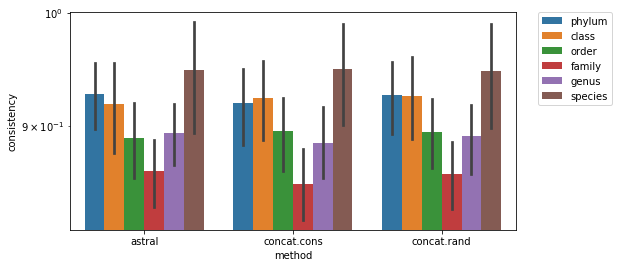

In [24]:
ax = sns.barplot(x='method', y='consistency', hue='rank', data=dfc)
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

In [25]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('output.pdf', bbox_to_inches='tight')